In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

In [454]:
df = pd.read_csv("data/IRIS.csv")
df = df.sample(frac=1) 
df['species'] = df['species'].astype('category').cat.codes


datas = df[["petal_length","petal_width","sepal_length","sepal_width"]].to_numpy()
labels = df["species"].to_numpy()

split = round(len(datas)*0.8)
train_data_split = datas[:split]
train_label_split = labels[:split]
test_data_split = datas[split:]
test_label_split = labels[split:]


print(test_label_split)

[0 2 0 2 1 1 0 1 0 0 1 2 0 1 2 2 2 1 2 2 1 0 0 1 2 1 2 2 2 0]


In [455]:
class KNN():


    def __init__(self,k = 1):
        self.k = k

    def _euclidean_distance(self, x1,x2):
        return np.sqrt(np.sum(x2-x1)**2)
    
    def fit(self, train, label):
        self.train = train
        self.label = label

    def predict(self, x):
        
        distances = [self._euclidean_distance(X,x) for X in self.train]
        indexes = np.argsort(distances)[:self.k]
        k_labels = [self.label[i] for i in indexes]
        most = Counter(k_labels).most_common()
        return most[0][0]


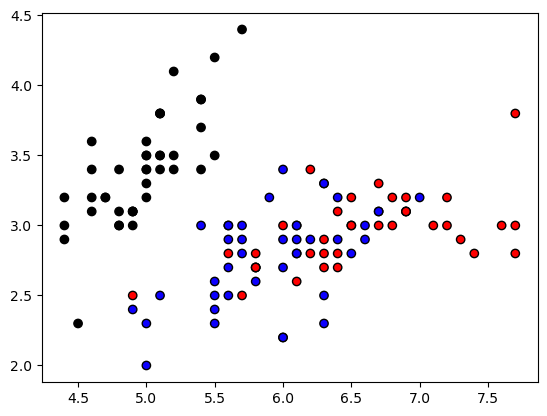

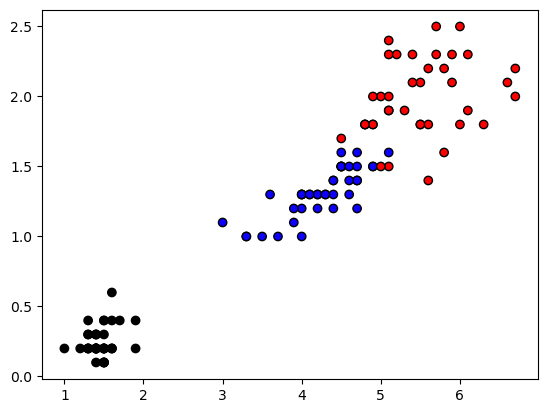

In [456]:
cmap = ListedColormap(["#000000","#0D00FF","#FF0000"])

plt.figure()
plt.scatter(train_data_split[:,2],train_data_split[:,3], c=train_label_split, cmap=cmap, edgecolor='k')
plt.show()

plt.figure()
plt.scatter(train_data_split[:,0],train_data_split[:,1], c=train_label_split, cmap=cmap, edgecolor='k')
plt.show()


In [457]:
knn = KNN(5)

knn.fit(train_data_split,train_label_split)
predictions = [knn.predict(i) for i in test_data_split]
print(predictions)

accuracy = np.sum(predictions == test_label_split) / len(test_label_split)
print(accuracy)

[0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0]
0.9
